# Seasonal Profits Tables

*Import programs*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
budget = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [3]:
def getSeason(release_date):
    if (release_date[0:3] == "Dec") or  (release_date[0:3] == "Jan") or (release_date[0:3] == "Feb"):
        return "Winter"
    elif(release_date[0:3] == "Mar") or (release_date[0:3] == "Apr") or (release_date[0:3] == "May"):
        return "Spring"
    elif(release_date[0:3] == "Jun") or (release_date[0:3] == "Jul") or (release_date[0:3] == "Aug"):
        return "Summer"
    else:
        return "Fall"
    
season = budget.release_date.apply(getSeason)
budget['Season'] = season
budget

        

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Season
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Winter
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Spring
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Summer
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Spring
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Winter
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,Winter
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",Spring
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",Summer
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,Fall


In [4]:
budget["year"] = budget.release_date.apply(lambda x: x[-4:])
budget.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
Season               object
year                 object
dtype: object

In [5]:
budget.year = budget.year.astype(int)


In [6]:
budget = budget[budget.year>=2015]

In [7]:
budget["Season"].value_counts()

Winter    270
Fall      237
Spring    234
Summer    197
Name: Season, dtype: int64

In [8]:
budget['production_budget'] = budget['production_budget'].str.replace('$', '')
budget['domestic_gross'] = budget['domestic_gross'].str.replace('$', '')
budget['production_budget'] = budget['production_budget'].str.replace(',', '')
budget['domestic_gross'] = budget['domestic_gross'].str.replace(',', '')

budget

<ipython-input-8-7a4b55539a81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budget['production_budget'] = budget['production_budget'].str.replace('$', '')
<ipython-input-8-7a4b55539a81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budget['domestic_gross'] = budget['domestic_gross'].str.replace('$', '')
<ipython-input-8-7a4b55539a81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Season,year
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,"$149,762,350",Summer,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,"$1,403,013,963",Spring,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,"$1,316,721,747",Winter,2017
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,"$2,053,311,220",Winter,2015
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,"$2,048,134,200",Spring,2018
...,...,...,...,...,...,...,...,...
5751,52,"Dec 1, 2015",Dutch Kills,25000,0,$0,Winter,2015
5756,57,"Apr 21, 2015",The Front Man,20000,0,$0,Spring,2015
5771,72,"May 19, 2015",Family Motocross,10000,0,$0,Spring,2015
5777,78,"Dec 31, 2018",Red 11,7000,0,$0,Winter,2018


In [9]:
budget[['domestic_gross', 'production_budget']] = budget[['domestic_gross', 'production_budget']].apply(pd.to_numeric)
budget = budget.drop(columns="worldwide_gross") #profit column
budget

/Users/katherineskoda/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,id,release_date,movie,production_budget,domestic_gross,Season,year
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,Summer,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,Spring,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,Winter,2017
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,Winter,2015
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,Spring,2018
...,...,...,...,...,...,...,...
5751,52,"Dec 1, 2015",Dutch Kills,25000,0,Winter,2015
5756,57,"Apr 21, 2015",The Front Man,20000,0,Spring,2015
5771,72,"May 19, 2015",Family Motocross,10000,0,Spring,2015
5777,78,"Dec 31, 2018",Red 11,7000,0,Winter,2018


In [10]:
budget.loc[budget['year'] == 2020]

,id,release_date,movie,production_budget,domestic_gross,Season,year
194,95,"Dec 31, 2020",Moonfall,150000000,0,Winter,2020
535,36,"Feb 21, 2020",Call of the Wild,82000000,0,Winter,2020
1205,6,"Dec 31, 2020",Hannibal the Conqueror,50000000,0,Winter,2020


In [11]:
budget["profit"] = budget["domestic_gross"] - budget["production_budget"]
budget


,id,release_date,movie,production_budget,domestic_gross,Season,year,profit
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,Summer,2019,-307237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,Spring,2015,128405868
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,Winter,2017,303181382
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,Winter,2015,630662225
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,Spring,2018,378815482
...,...,...,...,...,...,...,...,...
5751,52,"Dec 1, 2015",Dutch Kills,25000,0,Winter,2015,-25000
5756,57,"Apr 21, 2015",The Front Man,20000,0,Spring,2015,-20000
5771,72,"May 19, 2015",Family Motocross,10000,0,Spring,2015,-10000
5777,78,"Dec 31, 2018",Red 11,7000,0,Winter,2018,-7000


Text(0.5, 1.0, 'Seasonal profit')

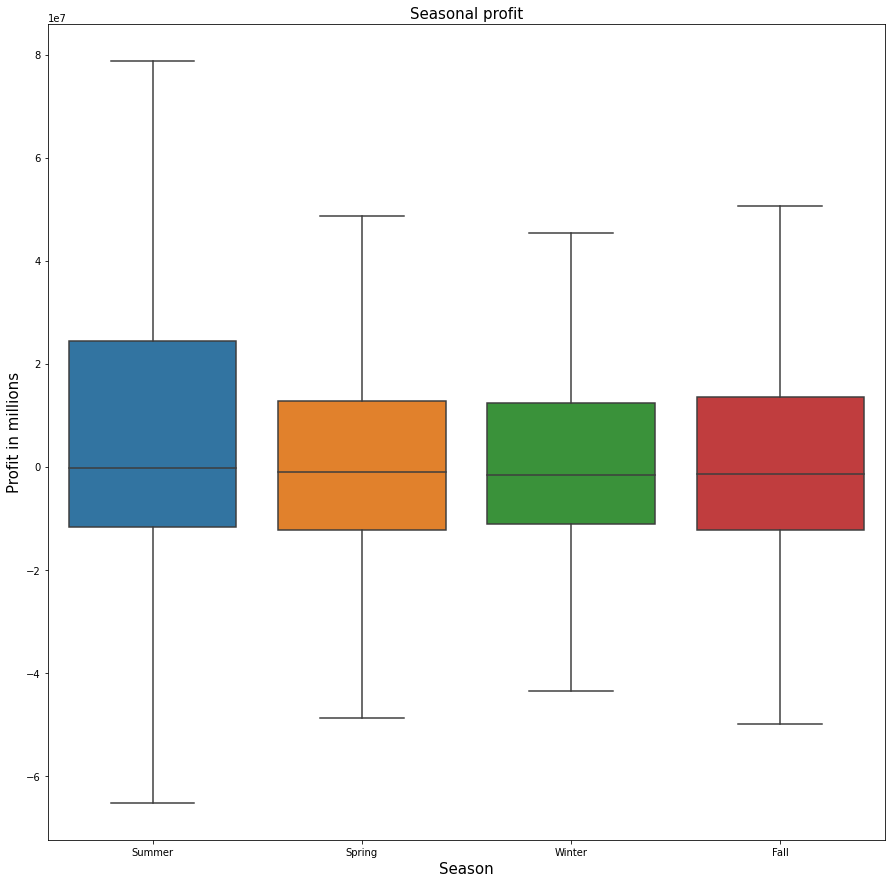

In [12]:
# Your code here
plot_five_fig, plot_five_ax = plt.subplots(figsize=(15,15))

sns.boxplot(x='Season', y='profit', data=budget, ax=plot_five_ax, showfliers=False)

plot_five_ax.set_xlabel('Season', fontsize = 15)

plot_five_ax.set_ylabel('Profit in millions', fontsize = 15)

plot_five_ax.set_title('Seasonal profit', fontsize = 15)

In [13]:
#Summer has the largest range which indicates a high risk of whether or not the profits will be great or negative

In [14]:
profit_mean = budget.profit.mean()
profit_mean

9372304.52238806

There is a mean profit of ~ 10 million dollars. To be successful, your movies should have a profit around that number

In [15]:
budget_mean = budget.production_budget.mean()
budget_mean

39360287.20682303

The mean budget is ~ 31 million dollars. Your movie should average a budget around that number to ensure a promising profit.

In [16]:
gross_mean = budget.domestic_gross.mean()
gross_mean

48732591.729211085

The average gross for american movies is around 42 million. You should be projecting your sales towards that number to be successful.

In [17]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
#sns.set_theme(style="whitegrid")

#penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
#g = sns.catplot(
 #   data=penguins, kind="bar",
 #   x="year", y="", hue="",
  #  ci="sd", palette="dark", alpha=.6, height=6
#)#
#.despine(left=True)
#g.set_axis_labels("", "U.S. Dollars ($)")
#g.legend.set_title("")

In [23]:
budget_groups = budget.groupby('year').mean().reset_index()
budget_groups2 = budget_groups[budget_groups.year<2020]

budget_groups2

,year,id,production_budget,domestic_gross,profit
0,2015,51.260355,2.616029e+07,3.193948e+07,5.779185e+06
1,2016,49.643836,4.097370e+07,5.042387e+07,9.450175e+06
2,2017,51.422619,5.003073e+07,6.222259e+07,1.219186e+07
3,2018,53.286713,4.813886e+07,7.378870e+07,2.564984e+07
4,2019,51.791045,5.273896e+07,4.280029e+07,-9.938666e+06


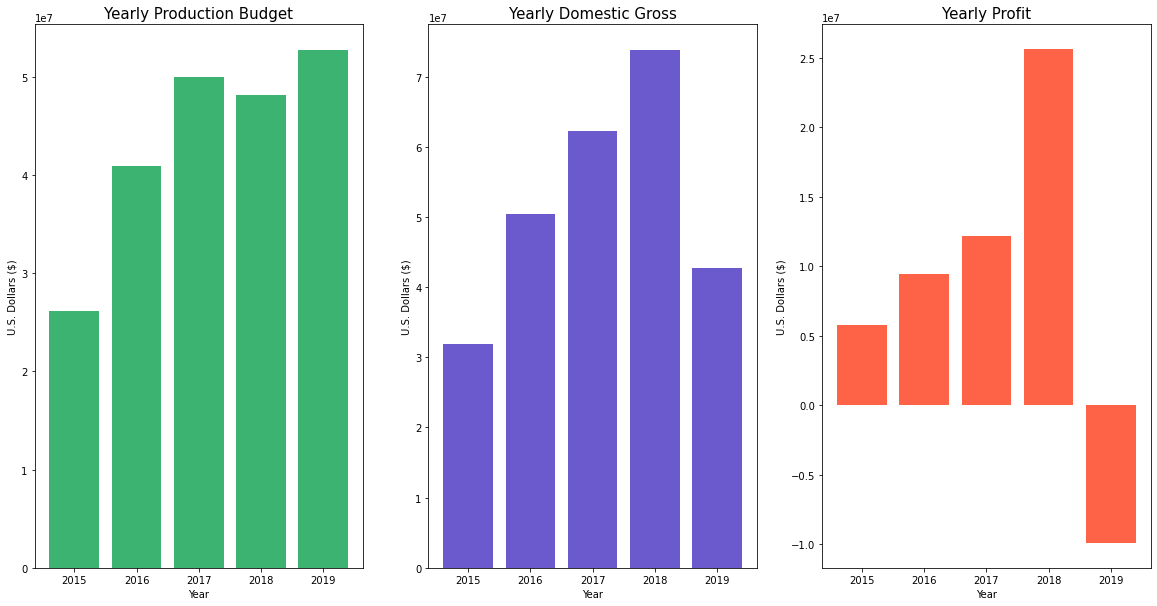

In [35]:
fig, ax = plt.subplots(figsize=(20,10), ncols=3)

ax[0].bar(budget_groups2.year, budget_groups2.production_budget, color='mediumseagreen')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('U.S. Dollars ($)')
ax[0].set_title('Yearly Production Budget', fontsize=15)

ax[1].bar(budget_groups2.year, budget_groups2.domestic_gross, color='slateblue')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('U.S. Dollars ($)')
ax[1].set_title('Yearly Domestic Gross', fontsize=15)


ax[2].bar(budget_groups2.year, budget_groups2.profit, color='tomato')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('U.S. Dollars ($)')
ax[2].set_title('Yearly Profit', fontsize=15);




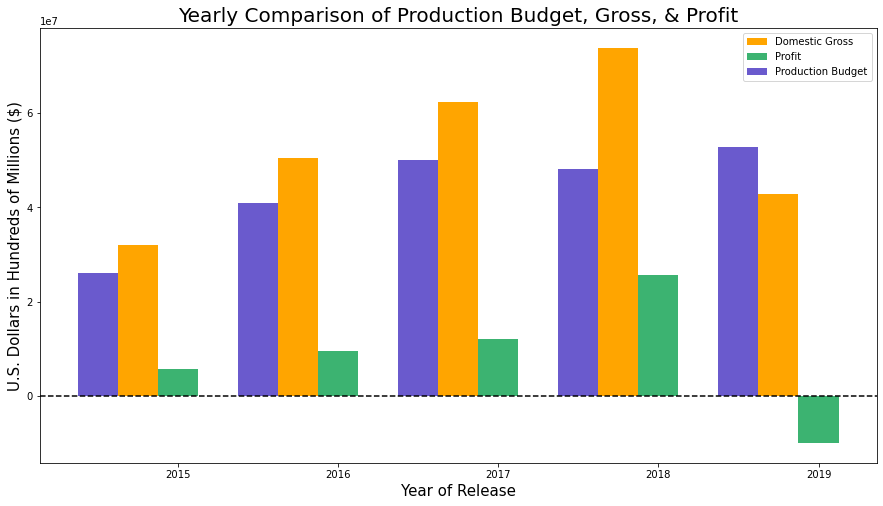

In [64]:
fig, ax = plt.subplots(figsize=(15,8))
N = 5
ind = np.arange(N) 
width = 0.25

xvals = budget_groups2['domestic_gross']
bar1 = plt.bar(ind, xvals, width, color = 'orange')

yvals2 = budget_groups2['profit']
bar2 = plt.bar(ind+width, yvals2, width, color = 'mediumseagreen')

zvals3 = budget_groups2['production_budget']
bar3 = plt.bar(ind-width, zvals3, width, color = 'slateblue')




plt.xlabel("Year of Release", fontsize=15)
plt.ylabel('U.S. Dollars in Hundreds of Millions ($)', fontsize=15)
plt.title("Yearly Comparison of Production Budget, Gross, & Profit", fontsize=20)

plt.axhline(y=0.5, color='black', linestyle='--')


plt.xticks(ind+width, ['2015','2016','2017','2018','2019'])
plt.legend( (bar1, bar2, bar3), ('Domestic Gross', 'Profit', 'Production Budget') )

plt.show()